## 8.1 序列模型
想象一下你在看网飞上的电影。作为一名忠实的用户，你对每部电影都给出评价，毕竟一部好电影需要更多的支持和认可。然而事实证明，事情并不那么简单。随着时间的推移，人们对电影的看法会发生很大的变化。事实上，心理学家甚至对这些现象起了个名字：
- 锚定(anchoring)效应：基于其他人的意见做出评价。例如，奥斯卡颁奖后，受到关注的电影的评分会上升，尽管它还是原来那部电影。这种影响将持续几个月，直到人们忘记了这部电影曾经获得的奖项。
- 享乐适应(hedonic adaption)：人们迅速接受并适应一种更好或者更坏的情况作为新的常态。例如，在看了很多好电影之后，人们会强烈期望下部电影会更好。因此，在许多精彩电影被看过之后，即使是一部普通的电影也可能会被认为是糟糕的。
- 季节性(seasonality)：少有观众喜欢在八月看圣诞老人的电影
- 有时，电影会由于导演或演员在制作中的不当行为变得不受欢迎
- 有些电影因为其极度糟糕只能成为小众电影。

简而言之，电影评分决不是固定不变的。因此，使用时间动力学可以得到更准确的电影推荐。当然，序列数据不仅仅是关于电影评分的。下面给出了更多场景：
- 在使用应用程序时，许多用户都有很强的特定习惯。例如，学生放学后社交媒体应用更受欢迎。在市场开放时股市交易软件更受欢迎。
- 预测明天的股价要比过去的股价更困难，尽管两者都只是估计一个数字。毕竟，先见之明比事后诸葛难得多。在统计学中，前者(对超出已知观测范围进行预测)称为外推法(extrapolation)，而后者(在现有观测值之间进行估计)称为内插法(interpolation)。
- 在本质上，音乐、语言、文本和视频都是连续的。如果它们的序列被我们重排，那么就会失去原有的意义。比如，一个文本标题“狗咬人”远没有“人咬狗”那么令人惊讶，尽管组成两句话的字完全相同。
- 地震具有很强的相关性，即大地震发生后，很可能会有几次小余震，这些余震的强度比非大地震的余震大得多。事实上，地震是时空相关，即余震通常发生在很短的时间跨度和很近的距离内。
- 人类之间的互动也是连续的，这可以从微博上的争吵和辩论中看出。

### 8.1.1 统计工具
处理序列数据需要统计工具和新的深度神经网络架构。为了简单起见，我们以图8.1.1 所示的股票价格(富时100指数)为例。
<div align=center>
<img src='../../pics/8_1_1.jpeg' width='50%'>
</div>

其中，用$x_t$表示价格，即在时间步(time step)$t \in \mathbb Z ^+$时，观察到的价格$x_t$。请注意，$t$对于文本中的序列通常是离散的，并在整数或其子集上变化。假设一个交易员想在$t$日的股市中表现良好，于是通过以下途径预测$x_t$：
$$
x_t \sim P(x_t \mid x_{t-1}, ..., x_1)
$$

**自回归模型**

为了实现这个预测，交易员可以使用回归模型，例如在3.3节中训练的模型。仅有一个主要问题：输入数据的数量，输入$x_t, ..., x_1$本身因t而异。也就是说，输入数据的数量这个数字将会随着我们遇到的数据量的增加而增加，因此需要一个近似方法来使这个计算变得容易处理。本章后面的大部分内容将围绕着如何有效估计$P(x_t\mid x_{t-1}, ..., x_1$展开。简单地说，它归结为以下两种策略。

第一种策略，假设在现实情况下相当长的序列$x_{t-1}, ..., x_1$可能是不必要的，因此我们只需要满足某个长度为$r$的时间跨度，即使使用观测序列$x_{t-1}, ..., x_{t-r}$。当下获得的最直接的好处就是参数的数量总是不变的，至少在$t > r$时如此，这就是我们能够训练一个上面提及的深度网络。这种模型被称为自回归模型(autoregressive models)，因为它们是对自己执行回归。

第二张策略，如图8.1.2所示，是保留一些对过去观测的总结$h$，并且同时更新预测$\hat x_t$和总结$h_t$。这产生了基于$\hat x_t = P(x_t \mid h_t)$估计$x_t$，以及公式$h_t = g(h_{t-1}, x_{t-1})$更新的模型。由于$h_t$从未被观测到，这类模型也被称为隐变量自回归模型(latent autoregressive models)

<div align=center>
<img src='../../pics/8_1_2.jpeg' width='50%'>
</div>

这两种情况都有一个显而易见的问题：如何生成训练数据？一个经典方法是使用历史观测来预测下一个未来观测。显然，我们并不指望时间会停滞不前。然而，一个常见的假设是虽然特定值$x_t$可能会改变，但是序列本身的动力学不会改变。这样的假设是合理的，因为新的动力学一定受新的数据影响，而我们不可能用目前所掌握的数据来预测新的动力学。统计学家称不变的动力学为静止的(stationary)。因此，整个序列的估计值都将通过以下的方式获得：
$$
P(x_1,..., x_T) = \Pi_{t=1}^T P(x_t\mid x_{t-1}, ..., x_1)
$$
注意，如果我们处理的是离散的对象，而不是连续的数字，则上述的考虑仍然有效。唯一的差别是，对于离散的对象，我们需要使用分类器而不是回归模型来估计$P(x_t \mid x_{t-1}, ..., x_1)$


**马尔可夫模型**

回想一下，在自回归模型的近似法中，我们使用$x_{t-1}, ..., x_{t-r}$而不是$x_{t-1},..., x_1$来估计$x_t$。只要这种是近似精确的，我们就说序列满足马尔可夫条件(Markov condition)。特别是，如果$r=1$，得到一个一阶马尔可夫模型(first-order Markov model)，$P(x)$由下式给出：
$$
P(x_1, ..., x_T)=\Pi_{t=1}^T P(x_t \mid x_{t-1})   当P(x_1\mid x_0) = P(x_1)
$$

当假设$x_t$仅是离散值时，这样的模型特别棒，因为在这种情况下，使用动态规划可以沿着马尔可夫链精确地计算结果。例如，我们可以高效地计算$P(x_{t+1} \mid x_{t-1})$：
$$
\begin{align*}
P(x_{t+1} \mid x_{t-1}) & = \frac {\sum_{x_{t} P(x_{t+1}, x_{t}, x_{t-1})}}{P(x_{t-1})} \\
& = \frac {\sum_{x_{t}} P(x_{t+1 \mid x_t, x_{t-1} P(x_t, x_{t-1})})}{P(x_{t-1})} \\
& = \sum_{x_t} P(x_{t+1 \mid x_t}) P(x_t \mid x_{t-1})
\end{align*}
$$

利用这一事实，我们只需要考虑过去观察中的一个非常短的历史：$P(x_{t+1} \mid x_t, x_{t-1})$。隐马尔可夫模型中的动态规划超出本节的范围，而动态规划这些计算工具已经在控制算法和强化学习算法广泛使用。


**因果关系**

原则上，将$P(x_1, ..., x_T)$倒序展开也没有什么问题。毕竟，基于条件概率公式，我们总是可以写出：
$$
P(x_1, ..., x_T) = \Pi_{t=T}^1 P(x_t \mid x_{t+1}, ..., x_t)
$$

事实上，如果基于一个马尔可夫模型，我们还可以得到一个反向的条件概率分布。然而，在许多情况下，数据存在一个自然的方向，即在时间上是前进的。很明显，未来的事件不能影响过去。因此，如果我们改变$x_t$，可能会影响未来发生的事情$x_{t+1}$，但不能反过来。也就是说，如果我们改变$x_t$，基于过去事件得到的分布不会改变。因此，解释$P(x_{t+1} \mid x_t)$应该比解释$P(x_t \mid x_{t+1}) $更容易。例如，在某些情况下，对于某些可加性噪声$\epsilon$，显然我们可以找到$x_{t+1} = f(x_t) + \epsilon$，而反之则不行。

### 8.1.2 训练
在了解了上述统计工具后，让我们在实践中尝试一下！首先，我们生成一些数据：使用正弦函数和一些可加性噪声来生成序列数据，时间步为$1,2, ..., 1000$

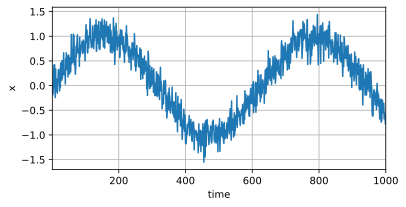

In [14]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

接下来，我们将这个序列转换为模型的“特征-标签”(feature-label)对。基于嵌入维度$r$，我们将数据映射为数据对$y_t = x_t$和$x_t = [x_{t-r}, ..., x_{t-1}]$。你可能已经注意到，这比我们提供的数据样本少了$r$个，因为我们没有足够的历史记录来描述前$r$个数据样本。一个简单的解决办法是：如果拥有足够长的序列就丢弃这几项；另一个方法是用零填充序列。在这里，我们仅使用前600个“特征-标签”对进行训练。

In [15]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
# 只有前n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

在这里，我们使用一个相当简单的架构训练模型：一个拥有两个全连接层的多层感知机，ReLU激活函数和平方损失

In [16]:
# 初始化网络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# 一个简单的多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction='none')

现在，准备训练模型。实现下面点训练代码的方式与前面几节相同。

In [17]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.080130
epoch 2, loss: 0.057061
epoch 3, loss: 0.051765
epoch 4, loss: 0.050349
epoch 5, loss: 0.048683


### 8.1.3 预测
由于训练损失很小，因此我们期望模型能有很好的工作效果。让我们看看在这实践中意味着什么。首先是检查模型预测下一个时间步的能力，也就是单步预测(one-step-ahead prediction)

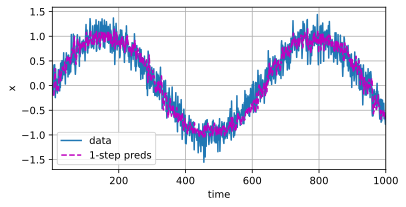

In [18]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000],
         figsize=(6, 3))

正如我们所料，单步预测效果不错。即使这些预测的时间步超过了600+4(n_train + tau)，其结果看起来仍然是可信的。然而有一个小问题：如果数据观察序列的时间步只到604，我们需要一步一步地向前迈进：
$$
\hat x_{605} = f(x_{601}, x_{602}, x_{603}, x_{604}), \\
\hat x_{606} = f(x_{602}, x_{603}, x_{604}, x_{605}), \\
\hat x_{607} = f(x_{603}, x_{604}, x_{605}, x_{606}), \\
\hat x_{608} = f(x_{604}, x_{605}, x_{606}, x_{607}), \\
\hat x_{609} = f(x_{605}, x_{606}, x_{607}, x_{608}), \\
$$

通常，对于直到$x_t$的观测序列，其在时间步$t+k$处的预测输出$\hat x_{t+k}$称为k步预测(k-step-ahead-prediction)。由于我们的观察已经到了$x_{604}$，它的k步预测是$\hat x_{604+k}$。换句话说，我们必须使用我们自己的预测(而不是原始数据)来进行多步预测。

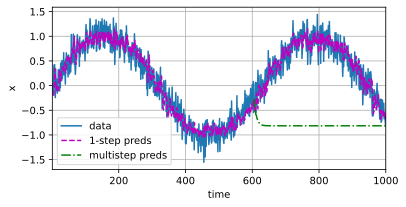

In [19]:
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(
        multistep_preds[i - tau:i].reshape((1, -1)))

d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

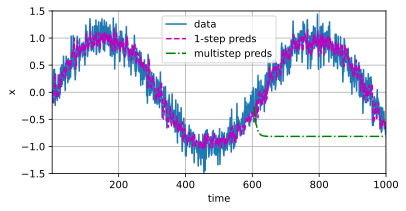

In [21]:
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(
        multistep_preds[i - tau:i].reshape((1, -1)))

d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000],ylim=[-1.5, 1.5], figsize=(6, 3))

如上面的例子所示，绿线的预测显然并不理想。经过几个预测步骤之后，预测的结果很快就会衰减到一个常数。为什么这个算法效果这么差呢？事实是由于错误的累积：假设在步骤1之后，我们积累了一些错误$\epsilon_1 = \bar \epsilon + c \epsilon_1$，其中$c$为某个常数，后面的预测误差以此类推。因此误差可能会相当地偏离真实的观测结果。例如，未来24小时的天气预报往往相当准确，但超过这一点，精度就会迅速下降。

基于$k=1,4,16,64$，通过对整个序列预测的计算，让我们更仔细地看一下k步预测的困难

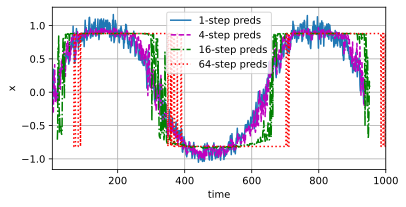

In [22]:
max_steps = 64
features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
# 列i(i<tau)是来自x的观测，其时间步从(i+1)到(i+T-tau-max_steps+1)
for i in range(tau):
    features[:, i] = x[i: i+T-tau-max_steps+1]

# 列i(i>=tau)是来自(i-tau+1)步的预测，其时间步从(i+1)到(i+T-tau-max_steps+1)
for i in range(tau, tau+max_steps):
    features[:, i] = net(features[:, i-tau:i]).reshape(-1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau+i-1: T-max_steps+i] for i in steps],
        [features[:, (tau+i-1)].detach().numpy() for i in steps], 'time', 'x',
        legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000], figsize=(6, 3))

以上例⼦清楚地说明了当我们试图预测更远的未来时，预测的质量是如何变化的。虽然“4步预测”看起来仍然不错，但超过这个跨度的任何预测⼏乎都是⽆⽤的。


### 8.1.4 小结
- 内插法（在现有观测值之间进⾏估计）和外推法（对超出已知观测范围进⾏预测）在实践的难度上差别很⼤。因此，对于你所拥有的序列数据，在训练时始终要尊重其时间顺序，即最好不要基于未来的数据进⾏训练。
- 序列模型的估计需要专⻔的统计⼯具，两种较流⾏的选择是⾃回归模型和隐变量⾃回归模型。
- 对于时间是向前推进的因果模型，正向估计通常⽐反向估计更容易。
- 对于直到时间步t的观测序列，其在时间步t + k的预测输出是“k步预测”。随着我们对预测时间k值的
增加，会造成误差的快速累积和预测质量的极速下降。